In [1]:
###################################################
### This file is part of numsimqubits.          ###
###                                             ###    
### Copyright (c) 2020 and later, Andras Gyenis ###
### All rights reserved.                        ###
###################################################

# Importing packages, modules.

import sys
sys.path.append('../')
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.display import display, Image, Markdown

import numsimqubits.qubits as nsq
from matplotlib.ticker import AutoMinorLocator
from qutip import Qobj

import numsimqubits.qubits.settings as sim_settings
sim_settings.update()

In [2]:
# Create the zeropi object in phase (phi) and charge (theta) basis.
zeropi = nsq.Zeropi(                      
                    E_J          = 6.0,                        # Josephson energy [GHz]
                    E_C_theta    = 0.09,                       # charging energy for the theta mode [GHz]
                    E_C_phi      = 1.14,                       # charging energy for the phi mode [GHz]
                    E_L          = 0.38,                       # inductive energy [GHz]
                    n_gate       = 0.,                         # gate voltage
                    n_gate_ls    = np.linspace(-0.5, 0.5, 21), # gate voltages to sweep          
                    phi_ext      = 0.,                         # external flux
                    phi_ext_ls   = np.linspace(-0.5, 0.5, 21), # external flux to sweep
                    phase_limits = [6*np.pi, np.pi],           # boundaries of phase space [phi, theta]
                    keig         = 20,                         # number of states to calculate
                    dims         = [151, 201],                 # number of points in phase space [phi, theta]
                    beta         = [0.27, 0.007],              # coupling constant for a coupled transmon-resonator case
                    f_resonator  = 7.                          # frequency of the coupled resonator [GHz]
                    )


In [3]:
# Diagonalize the Hamiltonian as a function of external flux.

zeropi.n_gate = -0.5 # set the offset charge
zeropi.sweep_diagonalize(sweep_variable='phi_ext')

100%|██████████| 21/21 [00:26<00:00,  1.26s/it]


<IPython.core.display.Javascript object>


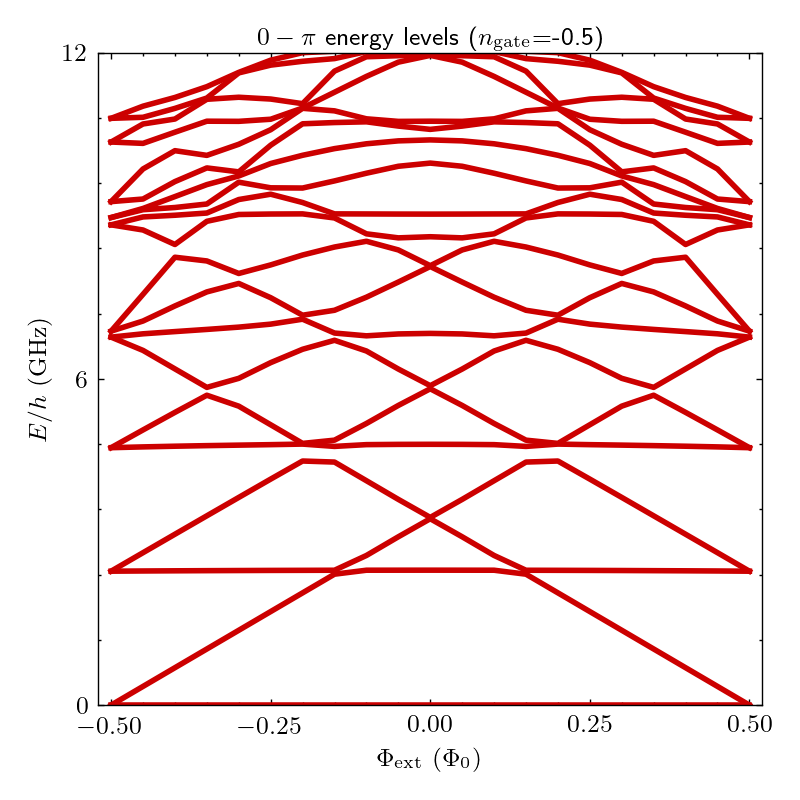

In [4]:
# Plot the energy disperion as a function of external flux.

fig, ax = plt.subplots(figsize=(4,4))

for level_idx in range(20):
    ln1, = ax.plot(zeropi.phi_ext_ls, zeropi.evals[:,level_idx], 
                   linewidth=2.0, color=[0.8,0,0])

ax.set_xlim([-0.52, 0.52])
ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_xlabel(r'$\Phi_\mathrm{ext}\ (\Phi_0)$')

ax.set_ylim([0, 12])
ax.set_yticks([0, 6, 12])
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_ylabel(r'$E/h\ (\mathrm{GHz})$')

ax.set_title(r'$0-\pi$ energy levels ($n_\mathrm{gate}$=' + str(zeropi.n_gate) + ')')

plt.tight_layout()
plt.show()

In [19]:
# Diagonalize the Hamiltonian as a function of offset charge.

zeropi.phi_ext = 0 # set the offset charge
zeropi.sweep_diagonalize(sweep_variable='n_gate')

100%|██████████| 21/21 [00:53<00:00,  2.56s/it]


<IPython.core.display.Javascript object>


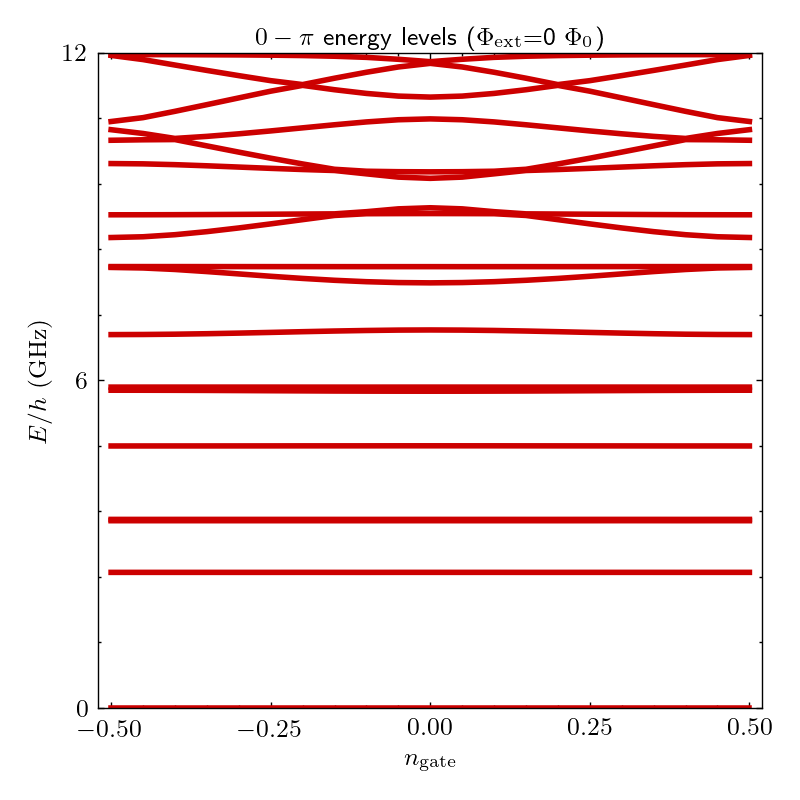

In [20]:
# Plot the energy disperion as a function of offset charge.

fig, ax = plt.subplots(figsize=(4,4))

for level_idx in range(20):
    ln1, = ax.plot(zeropi.n_gate_ls, zeropi.evals[:,level_idx], 
                   linewidth=2.0, color=[0.8,0,0])

ax.set_xlim([-0.52, 0.52])
ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_xlabel(r'$n_\mathrm{gate}$')

ax.set_ylim([0, 12])
ax.set_yticks([0, 6, 12])
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_ylabel(r'$E/h\ (\mathrm{GHz})$')

ax.set_title(r'$0-\pi$ energy levels ($\Phi_\mathrm{ext}$=' + str(zeropi.phi_ext) + ' $\Phi_0$)')

plt.tight_layout()
plt.show()




<IPython.core.display.Javascript object>


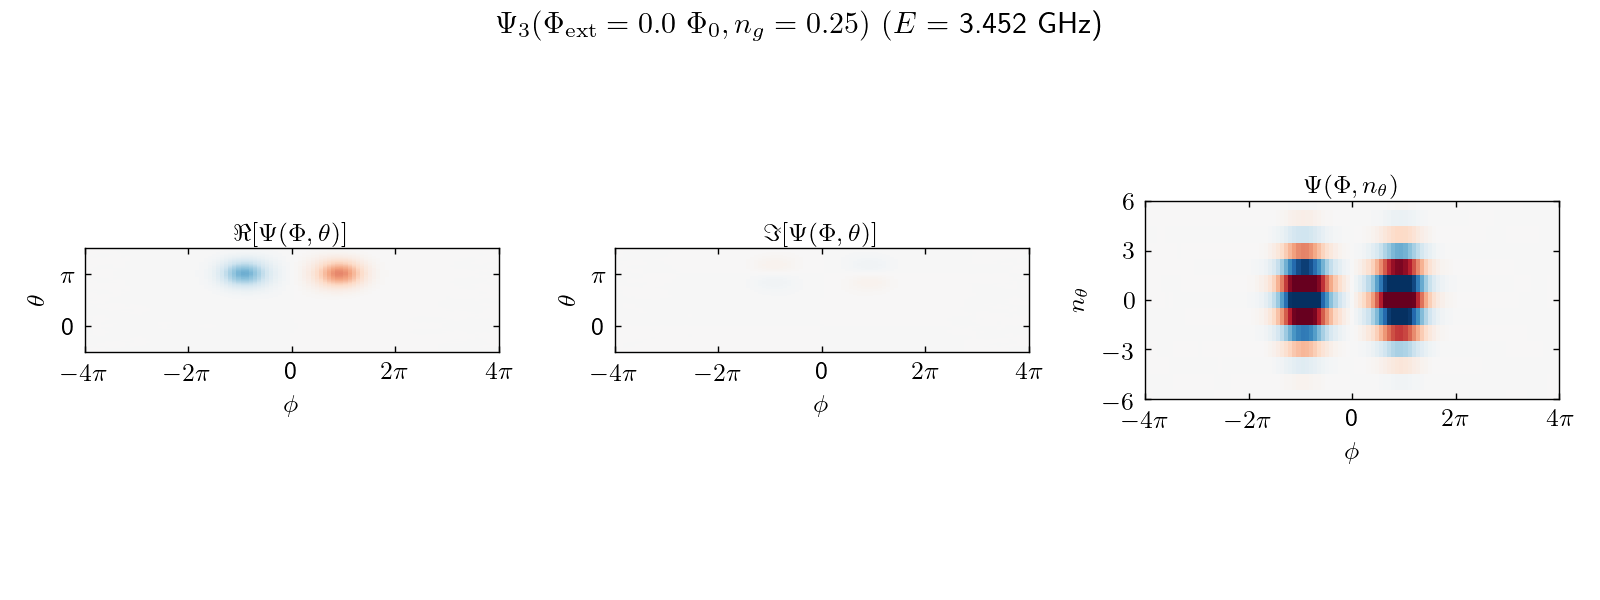

In [31]:
# Plot the wavefunction at a certain flux and charge value
n_level        = 3 # energy level
zeropi.phi_ext = 0. # external flux
zeropi.n_gate  = 0.25 # offset charge

results     = zeropi.diagonalize()
energy      = results['evals'][n_level]
eket_charge = results['ekets'][n_level]
fft         = zeropi.fourier_operator()
eket_phase  = np.array([np.dot(eket_charge[idx,:], fft) for idx in range(zeropi.dims[0])])
eket_phase  = np.roll(eket_phase,-int(zeropi.dims[1] / 4), axis = 1)
               
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(8,3))

axs[0].imshow(np.rot90(np.real(eket_phase)), extent=[-zeropi.phase_limits[0], zeropi.phase_limits[0], -0.5*np.pi, 1.5*np.pi],
              cmap='RdBu', vmin=-0.1, vmax=0.1)

axs[1].imshow(np.rot90(np.imag(eket_phase)), extent=[-zeropi.phase_limits[0], zeropi.phase_limits[0], -0.5*np.pi, 1.5*np.pi],
              cmap='RdBu', vmin=-0.1, vmax=0.1)

axs[2].imshow(np.rot90(eket_charge), extent=[-zeropi.phase_limits[0], zeropi.phase_limits[0], -(zeropi.dims[1]-1)/2, (zeropi.dims[1]-1)/2],
              cmap='RdBu', vmin=-0.1, vmax=0.1)

for axs_idx in range(3):
    axs[axs_idx].axis('scaled')
    axs[axs_idx].set_xlim([-4*np.pi, 4*np.pi])
    axs[axs_idx].set_xticks([-4*np.pi, -2*np.pi, 0, 2*np.pi, 4*np.pi])
    axs[axs_idx].set_xticklabels([r"$-4{\pi}$", r"$-2{\pi}$", 0, r"$2{\pi}$", r"$4{\pi}$"])
    axs[axs_idx].set_xlabel('$\phi$')

for axs_idx in range(2):
    axs[axs_idx].set_yticks([0, np.pi])
    axs[axs_idx].set_yticklabels([0, r"${\pi}$"])    
    axs[axs_idx].set_ylabel('$\\theta$')

axs[2].set_ylim([-6, 6])
axs[2].set_yticks([-6, -3, 0, 3, 6])
axs[2].set_ylabel('$n_\\theta$')

axs[0].set_title(r'$\Re[\Psi(\Phi,\theta)]$' )
axs[1].set_title(r'$\Im[\Psi(\Phi,\theta)]$')
axs[2].set_title(r'$\Psi(\Phi,n_\theta)$')

fig.suptitle(r'$\Psi_{%s}(\Phi_\mathrm{ext} = %s\ \Phi_0, n_g = %s) \ (E$ = %s GHz)' %(n_level, zeropi.phi_ext, zeropi.n_gate, np.round(energy,3)))

plt.tight_layout()
plt.show()

In [54]:
# Diagonalize the Hamiltonian as a function of external flux.

zeropi.n_gate = 0. # set the offset charge
zeropi.sweep_diagonalize(sweep_variable='phi_ext', calculate_mx_elements=True)

100%|██████████| 21/21 [00:26<00:00,  1.26s/it]


<IPython.core.display.Javascript object>


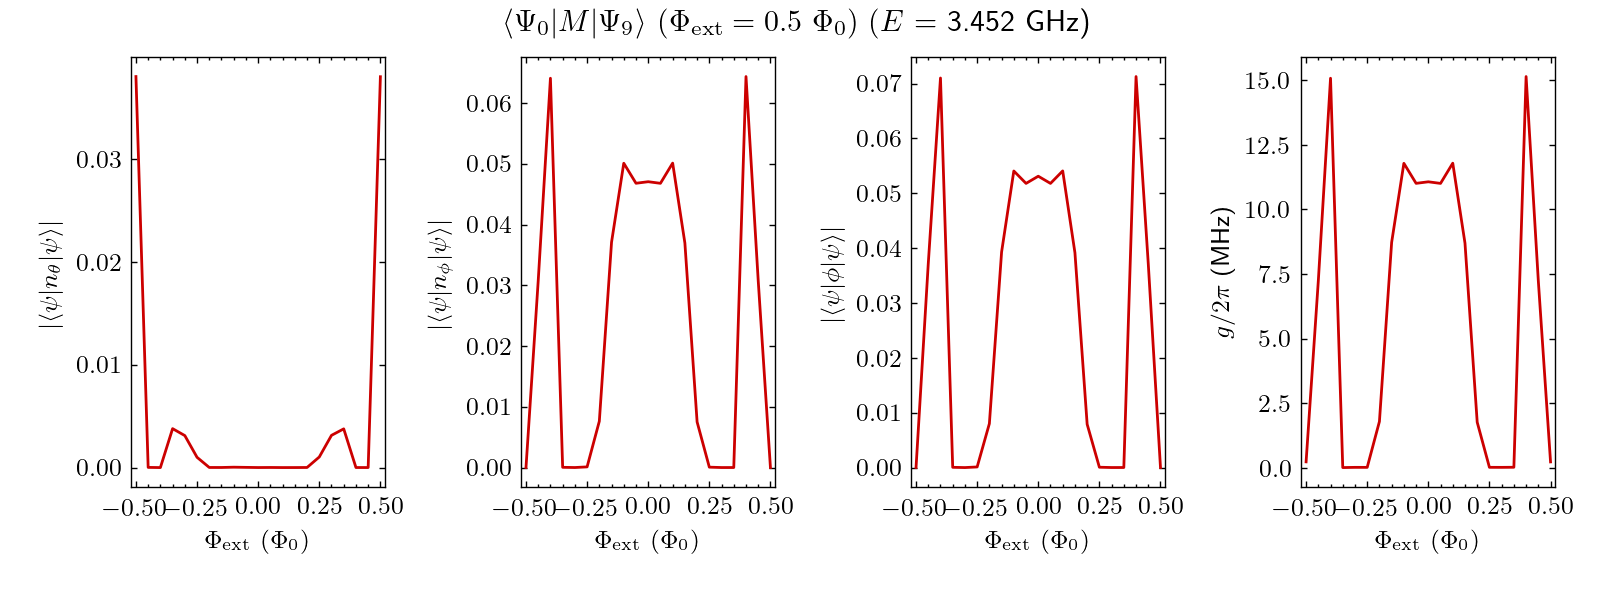

In [55]:
## Plot matrix elements as a function of flux

idx_level_i = 0 # energy level i
idx_level_j = 9 # energy level j

fig, axs = plt.subplots(figsize=(8,3), nrows=1, ncols=4)

axs[0].plot(zeropi.phi_ext_ls, np.abs(zeropi.n_theta[:,idx_level_i,idx_level_j]), linewidth = 1.0, color=[0.8,0,0])
axs[1].plot(zeropi.phi_ext_ls, np.abs(zeropi.n_phi[:,idx_level_i,idx_level_j]), linewidth = 1.0, color=[0.8,0,0])
axs[2].plot(zeropi.phi_ext_ls, np.abs(zeropi.phi[:,idx_level_i,idx_level_j]), linewidth = 1.0, color=[0.8,0,0])
axs[3].plot(zeropi.phi_ext_ls, 1e3*np.abs(zeropi.g[:,idx_level_i,idx_level_j]), linewidth = 1.0, color=[0.8,0,0])

axs[0].set_ylabel(r'$|\langle\psi|n_\theta|\psi\rangle|$')
axs[1].set_ylabel(r'$|\langle\psi|n_\phi|\psi\rangle|$')
axs[2].set_ylabel(r'$|\langle\psi|\phi|\psi\rangle|$')
axs[3].set_ylabel(r'$g/2\pi$ (MHz)')

for i in range(4):
    axs[i].set_xlim([-0.52, 0.52])
    axs[i].set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
    axs[i].xaxis.set_minor_locator(AutoMinorLocator(5))
    axs[i].set_xlabel(r'$\Phi_\mathrm{ext}\ (\Phi_0)$')

fig.suptitle(r'$\langle\Psi_{%s}|M|\Psi_{%s}\rangle\ (\Phi_\mathrm{ext} = %s\ \Phi_0) \ (E$ = %s GHz)' %(idx_level_i, idx_level_j, zeropi.phi_ext, np.round(energy,3)))    

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [25]:
# Diagonalize the Hamiltonian as a function of external flux.

zeropi.phi_ext = 0.25 # set the offset charge
zeropi.sweep_diagonalize(sweep_variable='n_gate', calculate_mx_elements=True)

100%|██████████| 21/21 [00:27<00:00,  1.32s/it]


<IPython.core.display.Javascript object>


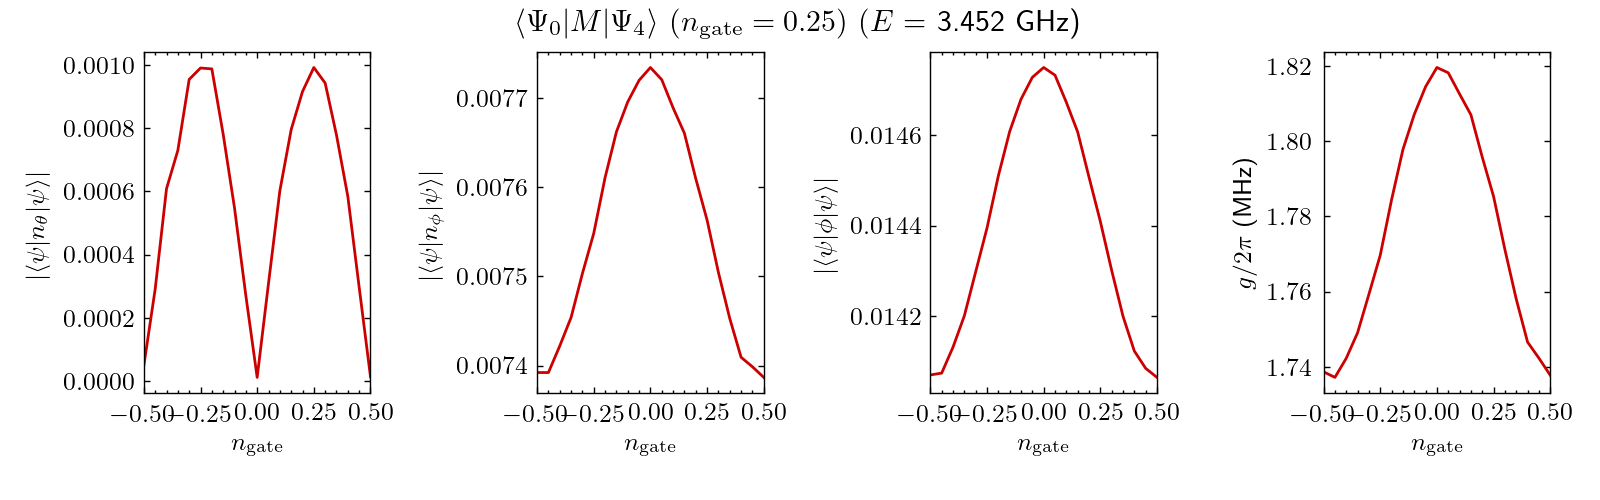

In [53]:
## Plot matrix elements as a function of flux

idx_level_i = 0 # energy level i
idx_level_j = 4 # energy level j

fig, axs = plt.subplots(figsize=(8,2.5), nrows=1, ncols=4)

axs[0].plot(zeropi.n_gate_ls, np.abs(zeropi.n_theta[:,idx_level_i,idx_level_j]), linewidth = 1.0, color=[0.8,0,0])
axs[1].plot(zeropi.n_gate_ls, np.abs(zeropi.n_phi[:,idx_level_i,idx_level_j]), linewidth = 1.0, color=[0.8,0,0])
axs[2].plot(zeropi.n_gate_ls, np.abs(zeropi.phi[:,idx_level_i,idx_level_j]), linewidth = 1.0, color=[0.8,0,0])
axs[3].plot(zeropi.phi_ext_ls, 1e3*np.abs(zeropi.g[:,idx_level_i,idx_level_j]), linewidth = 1.0, color=[0.8,0,0])

axs[0].set_ylabel(r'$|\langle\psi|n_\theta|\psi\rangle|$')
axs[1].set_ylabel(r'$|\langle\psi|n_\phi|\psi\rangle|$')
axs[2].set_ylabel(r'$|\langle\psi|\phi|\psi\rangle|$')
axs[3].set_ylabel(r'$g/2\pi$ (MHz)')

for i in range(4):
    axs[i].set_xlim([-0.5, 0.5])
    axs[i].set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
    axs[i].xaxis.set_minor_locator(AutoMinorLocator(5))
    axs[i].set_xlabel(r'$n_\mathrm{gate}$')

fig.suptitle(r'$\langle\Psi_{%s}|M|\Psi_{%s}\rangle\ (n_\mathrm{gate} = %s) \ (E$ = %s GHz)' %(idx_level_i, idx_level_j, zeropi.n_gate, np.round(energy,3)))    

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [30]:
# Plot the wavefunction at a certain flux and charge value
n_level_a      = 8 # energy level
n_level_b      = 0 # energy level
zeropi.phi_ext = 0. # external flux
zeropi.n_gate  = 0.25 # offset charge

results     = zeropi.diagonalize(calculate_mx_elements=True)
energy_a    = results['evals'][n_level_a]
energy_b    = results['evals'][n_level_b]
energy      = np.abs(energy_a - energy_b)
g           = np.abs(results['g'][n_level_a][n_level_b])
chi         = np.abs(results['chi'][n_level_a]-results['chi'][n_level_b])

display(Markdown('$\omega_{%s}/2\pi = $ %.3f GHz' % (n_level_a, energy_a)))
display(Markdown('$\omega_{%s}/2\pi = $ %.3f GHz' % (n_level_b, energy_b)))
display(Markdown('$\Delta\omega/2\pi = $ %.3f MHz' % (energy*1e3)))
display(Markdown('$g_{%s%s}/2\pi = $ %.3f MHz' % (n_level_a, n_level_b, g*1e3)))
display(Markdown('$\chi_{%s%s}/2\pi = $ %.2f MHz' % (n_level_a, n_level_b,chi*1e3)))

$\omega_{8}/2\pi = $ 7.904 GHz

$\omega_{0}/2\pi = $ 0.000 GHz

$\Delta\omega/2\pi = $ 7904.425 MHz

$g_{80}/2\pi = $ 0.039 MHz

$\chi_{80}/2\pi = $ 14.70 MHz